In [65]:
# Code used for Regression Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%store -r cg
%store -r mg

In [66]:
# Defining cg and mg to avoid dozens of 'variable is not defined' warnings
cg = cg
mg = mg

In [67]:
# Converts a number of wins, losses, and ties to a fractional score (fscore), intended for the value_counts() as inputs
def fscore(arr):
    return (arr[0] + arr[2]*0.5)/sum(arr)

# Used to shorten my code, vc short for value counts
def vc(df,cond):
    return df[cond].magnus_result.value_counts()

def vco(df): # vco short for value counts overall
    return df.magnus_result.value_counts()

<img src='ceChmnN.png' style='width:400px;height:400px'/>

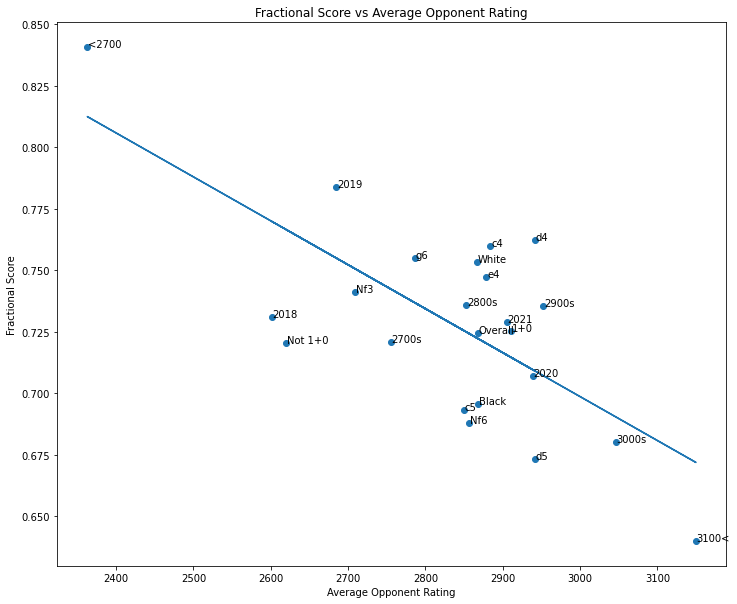

In [68]:
# This scatterplot contains all of the values I calculated in Fractional Score Analysis and includes a line of best fit.
# I want a line of best fit to show how different factors positively or negatively affect Magnus's win rate.
# I use np.mean because it's shorter than sum()/len(). 
# I use np.array because it's necessary for np.polyfit to work.

x = np.array([np.mean(mg.opp_elo),
    np.mean(mg[mg.datetime.str[0:4]=='2018'].opp_elo),
    np.mean(mg[mg.datetime.str[0:4]=='2019'].opp_elo),
    np.mean(mg[mg.datetime.str[0:4]=='2020'].opp_elo),
    np.mean(mg[mg.datetime.str[0:4]=='2021'].opp_elo),

    np.mean(mg[mg.magnus_color=='black'].opp_elo),
    np.mean(mg[mg.magnus_color=='white'].opp_elo),

    np.mean(mg[mg.opp_elo<2700].opp_elo),
    np.mean(mg[(mg.opp_elo<2800) &(mg.opp_elo>=2700)].opp_elo),
    np.mean(mg[(mg.opp_elo<2900) &(mg.opp_elo>=2800)].opp_elo),
    np.mean(mg[(mg.opp_elo<3000) &(mg.opp_elo>=2900)].opp_elo),
    np.mean(mg[(mg.opp_elo<3100) &(mg.opp_elo>=3000)].opp_elo),
    np.mean(mg[mg.opp_elo>=3100].opp_elo),
    
    np.mean(mg[mg.time_control=='1+0'].opp_elo),
    np.mean(mg[mg.time_control!='1+0'].opp_elo),
    
    np.mean(mg[mg.first_move=='d5'].opp_elo),
    np.mean(mg[mg.first_move=='Nf6'].opp_elo),
    np.mean(mg[mg.first_move=='c5'].opp_elo),
    np.mean(mg[mg.first_move=='g6'].opp_elo),
    
    np.mean(mg[mg.first_move=='e4'].opp_elo),
    np.mean(mg[mg.first_move=='d4'].opp_elo),
    np.mean(mg[mg.first_move=='c4'].opp_elo),
    np.mean(mg[mg.first_move=='Nf3'].opp_elo),])

y = np.array([fscore(vco(cg)),
    fscore(vc(cg,cg.datetime.str[0:4]=='2018')),
    fscore(vc(cg,cg.datetime.str[0:4]=='2019')),
    fscore(vc(cg,cg.datetime.str[0:4]=='2020')),
    fscore(vc(cg,cg.datetime.str[0:4]=='2021')),

    fscore(vc(mg,mg.magnus_color=='black')),
    fscore(vc(mg,mg.magnus_color=='white')),
    
    fscore(vc(mg,mg.opp_elo<2700)),
    fscore(vc(mg,(mg.opp_elo<2800) &(mg.opp_elo>=2700))),
    fscore(vc(mg,(mg.opp_elo<2900) &(mg.opp_elo>=2800))),
    fscore(vc(mg,(mg.opp_elo<3000) &(mg.opp_elo>=2900))),
    fscore(vc(mg,(mg.opp_elo<3100) &(mg.opp_elo>=3000))),
    fscore(vc(mg,mg.opp_elo>=3100)),
    
    fscore(vc(cg,cg.time_control=='1+0')),
    fscore(vc(cg,cg.time_control!='1+0')),
    
    fscore(vc(cg,cg.first_move=='d5')),
    fscore(vc(cg,cg.first_move=='Nf6')),
    fscore(vc(cg,cg.first_move=='c5')),
    fscore(vc(cg,cg.first_move=='g6')),
    
    fscore(vc(cg,cg.first_move=='e4')),
    fscore(vc(cg,cg.first_move=='d4')),
    fscore(vc(cg,cg.first_move=='c4')),
    fscore(vc(cg,cg.first_move=='Nf3')),])
plt.scatter(x,y)
a, b = np.polyfit(x,y,1)
plt.plot(x,a*x+b)
label = ['Overall','2018','2019','2020','2021',
        'Black','White',
        '<2700','2700s','2800s','2900s','3000s','3100<',
        '1+0','Not 1+0',
        'd5','Nf6','c5','g6',
        'e4','d4','c4','Nf3']


for i, txt in enumerate(label):
    plt.annotate(txt, (x[i]+1, y[i]))

plt.rcParams["figure.figsize"] = (12,10)
plt.title('Fractional Score vs Average Opponent Rating')
plt.xlabel('Average Opponent Rating')
plt.ylabel('Fractional Score')
plt.show()

In [69]:
print(f'Line of Best Fit Equation: y = {a}*x + {b}')


Line of Best Fit Equation: y = -0.00017860664096769073*x + 1.2345263852069768


In [70]:
print(f'The correlation coefficient is {np.corrcoef(x,y)[0][1]}.')
print(f'r^2 is {np.corrcoef(x,y)[0][1]**2}.')
# About half of the variance in fractional score is due to average opponent rating. 
# The other half could be due to factors explored in this analysis such as time control, color, first move, year
# as well as other factors such as Magnus's mood, time of day, specific oppponent, etc.
# Average opponent rating is clearly the biggest factor out of the factors I explored.

The correlation coefficient is -0.702841687798795.
r^2 is 0.49398643810785875.


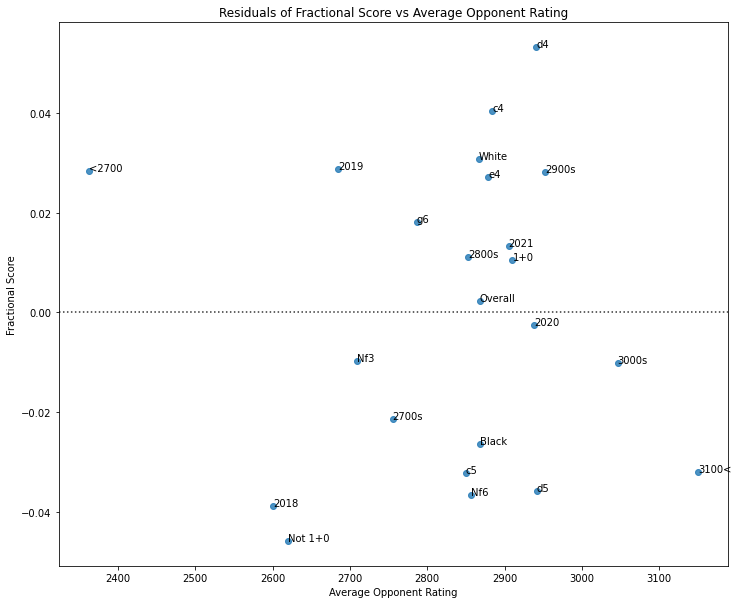

In [71]:
# Graphs the residuals of scatterplot above. 
# I couldn't figure out a way to get the specific y value of the sns.residplot points so I calculated it manually.

predicted = np.array([a*i+b for i in x])
actual = np.array(y)
residuals = actual - predicted

label = ['Overall','2018','2019','2020','2021','Black','White','<2700','2700s','2800s','2900s','3000s','3100<','1+0','Not 1+0',
         'd5','Nf6','c5','g6','e4','d4','c4','Nf3']
sns.residplot(x=x,y=y)
for i, txt in enumerate(label):
    plt.annotate(txt, (x[i], residuals[i]))

plt.title('Residuals of Fractional Score vs Average Opponent Rating')
plt.xlabel('Average Opponent Rating')
plt.ylabel('Fractional Score')
plt.show()

# Observations:
# g6 stands out a lot as the best 1st move for black.
# d4 stands out a lot as the best 1st move for white
# Not 1+0 stands out as a bad time control for Magnus.
# 2018 stands out of a bad year for Magnus.
# Magnus clearly plays better as White than as Black.


In [74]:
# Diff b/w Black and White: .057
# Diff b/w 2018 and 2019:   .068
# Diff b/w <2700 and 3100<: .060
# Diff b/w 1+0 and not 1+0: .056
# Diff b/w Nf6 and g6:      .055
# Diff b/w d4 and Nf3:      .063
[[label[i],residuals[i]] for i in range(23)]

[['Overall', 0.002218895784328434],
 ['2018', -0.03891423584736997],
 ['2019', 0.028749950429653892],
 ['2020', -0.0025557593841342152],
 ['2021', 0.013229820180642449],
 ['Black', -0.026505953244919667],
 ['White', 0.030764587751023975],
 ['<2700', 0.028310499507844256],
 ['2700s', -0.02146537380057567],
 ['2800s', 0.011020213305399484],
 ['2900s', 0.02811762449869426],
 ['3000s', -0.010211007871385291],
 ['3100<', -0.03196127689126782],
 ['1+0', 0.010493717786076107],
 ['Not 1+0', -0.04592972568546494],
 ['d5', -0.03586768294169107],
 ['Nf6', -0.03658351956452688],
 ['c5', -0.03227730472296031],
 ['g6', 0.018135278326178228],
 ['e4', 0.027138103322580043],
 ['d4', 0.05329464107943849],
 ['c4', 0.0404889135358526],
 ['Nf3', -0.009690405553417714]]